# ROCKVILLE HOUSING EXPLORATORY DATA ANALYSIS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('bmh')

# #!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# print('Libraries imported!')

In [2]:
# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim

## Table of Content
<div class="alert alert-block alert-info" style="margin-top: 20px">

1. <a href="#item1">Read data</a>

2. <a href="#item2">Merge all CSV into a single dataframe</a>

3. <a href="#item3">Find duplicates</a>  
   
4. <a href="#item4">Find and fill missing values</a>
    
5. <a href="#item5">Filter outliers</a>
    
6. <a href="#item6">Export cleaned data</a>
    
</div>

<a id="item1"></a>

## Read data

In [4]:
prop_df = pd.read_csv('capstone_data/houses_filtered.csv')
prop_df.head()

SALE TYPE              PROPERTY TYPE                ADDRESS  \
0  MLS Listing  Single Family Residential  9100 Chesley Knoll Ct   
1    PAST SALE  Single Family Residential        12136 Pawnee Dr   
2    PAST SALE  Single Family Residential     14640 Brougham Way   
3    PAST SALE  Single Family Residential         114 Mission Dr   
4    PAST SALE  Single Family Residential      18510 Traxell Way   

            CITY STATE OR PROVINCE  ZIP OR POSTAL CODE   PRICE  BEDS  BATHS  \
0   Gaithersburg                MD               20879  420000   5.0    3.0   
1   Gaithersburg                MD               20878  570000   4.0    2.5   
2  North Potomac                MD               20878  636000   4.0    2.5   
3   Gaithersburg                MD               20878  668000   4.0    3.5   
4   Gaithersburg                MD               20879  489200   4.0    3.5   

   SQUARE FEET  LOT SIZE  YEAR BUILT  PRICE PER SQFT  HOA PER MONTH  \
0       2250.0   11798.0      1982.0           187.0            0.0   
1       2814.0   14656.0      1973.0           203.0            0.0   
2       4008.0   17061.0      1986.0           159.0            0.0   
3       2960.0    6388.0      1991.0           226.0            8.0   
4       2388.0    7402.0      1994.0           205.0           25.0   

                                                 URL   LATITUDE  LONGITUDE  
0  http://www.redfin.com/MD/Gaithersburg/9100-Che...  39.180400 -77.185015  
1  http://www.redfin.com/MD/Gaithersburg/12136-Pa...  39.124472 -77.252308  
2  http://www.redfin.com/MD/North-Potomac/14640-B...  39.095535 -77.250192  
3  http://www.redfin.com/MD/Gaithersburg/114-Miss...  39.107758 -77.216220  
4  http://www.redfin.com/MD/Gaithersburg/18510-Tr...  39.160043 -77.184394

In [5]:
prop_df.shape

(804, 17)

## Explore distribution of numeric columns

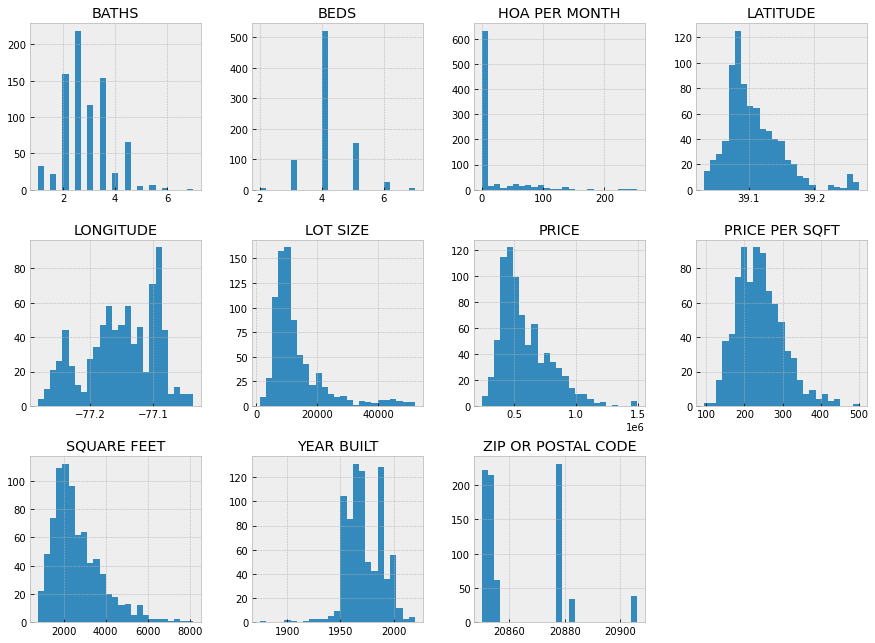

In [6]:
ax_list = prop_df.hist(bins=25, layout=(4,4), figsize=(15,15))

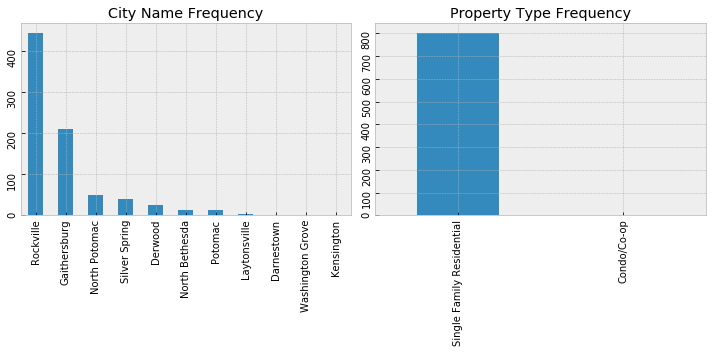

In [6]:
fig2, ax2 = plt.subplots(1,2, figsize=(10,5))
prop_df['CITY'].value_counts().plot(kind='bar', ax=ax2[0], title='City Name Frequency')
ax2[0].tick_params(labelrotation=90)

prop_df['PROPERTY TYPE'].value_counts().plot(kind='bar', ax=ax2[1], title='Property Type Frequency')
ax2[1].tick_params(labelrotation=90)

plt.tight_layout()
plt.savefig(r'capstone_images/city-counts.png',dpi=300)

## Correlation among features

In [7]:
list(set(prop_df.dtypes.tolist()))  # List all the types of the dataset
df_num = prop_df.select_dtypes(include = ['int64','float64'])

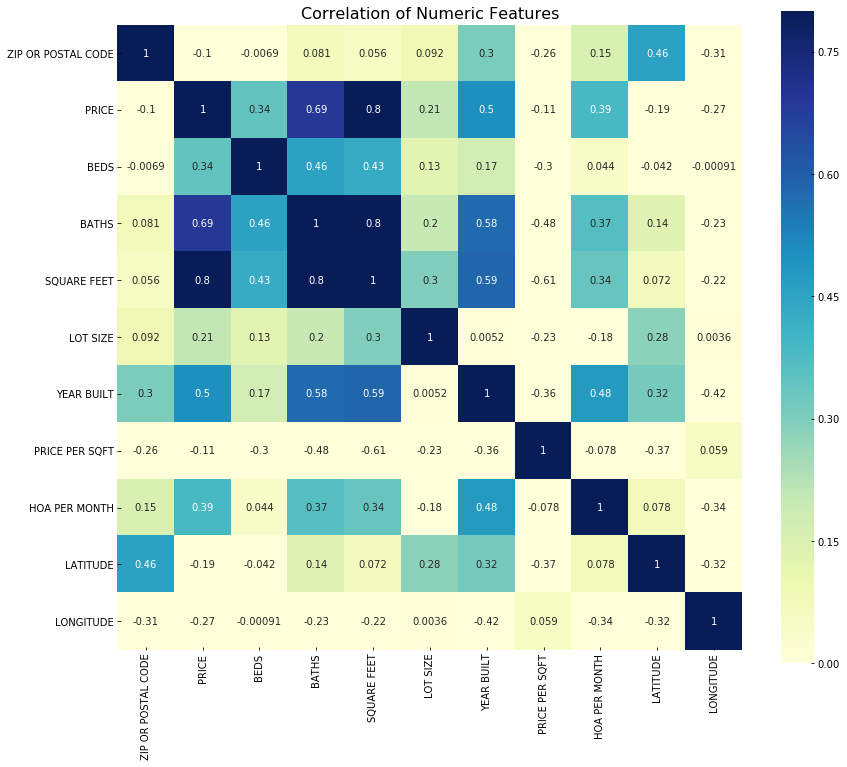

In [8]:
# Plot correlation heat map
corr = df_num.corr()
f,ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of Numeric Features',size=16)
ax = sns.heatmap(corr,
                square=True,
                annot=True,
                vmax=0.8,
                vmin=0,
                cmap="YlGnBu")
#fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.savefig('capstone_images/heatmap_num_dist.png',dpi=300)
plt.show() # ta-da!

Let's find attributes that are strongly correlated to `PRICE`.

In [9]:
df_num_corr = df_num.corr()['PRICE']
golden_features_list = df_num_corr[(abs(df_num_corr) > 0.5)&(abs(df_num_corr) <1)].sort_values(ascending=False)
print('There are {} strongly correlated values with PRICE:\n{}'.format(len(golden_features_list), golden_features_list))

There are 3 strongly correlated values with PRICE:
SQUARE FEET    0.800840
BATHS          0.688210
YEAR BUILT     0.502018
Name: PRICE, dtype: float64


## Price variation among neighborhoods

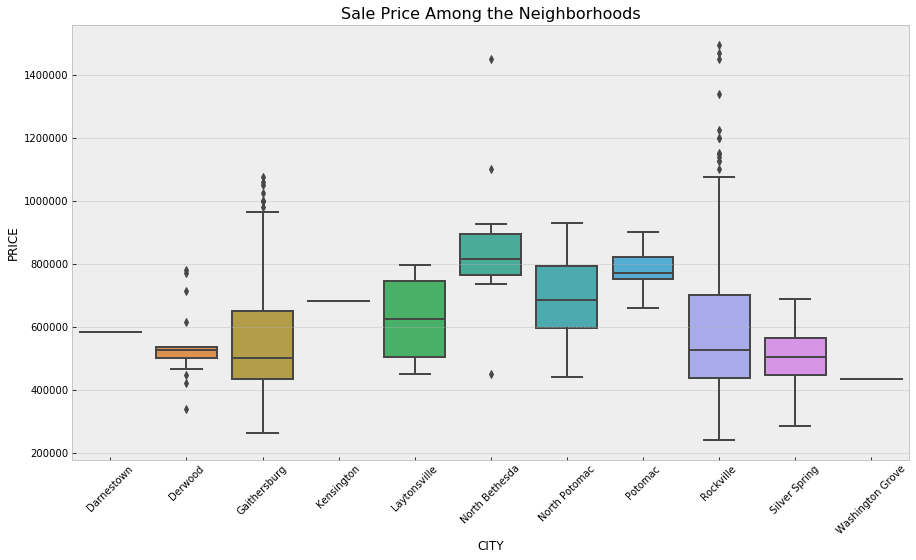

In [10]:
f,ax = plt.subplots(figsize=(15,8))
fig = sns.boxplot(x='CITY', y='PRICE',data=prop_df.sort_values(by='CITY'))
fig.axis()
plt.xticks(rotation=45)
plt.title('Sale Price Among the Neighborhoods', size=16)
plt.savefig('capstone_images/saleprice_neighborhoods.png',dpi=300)
plt.show()

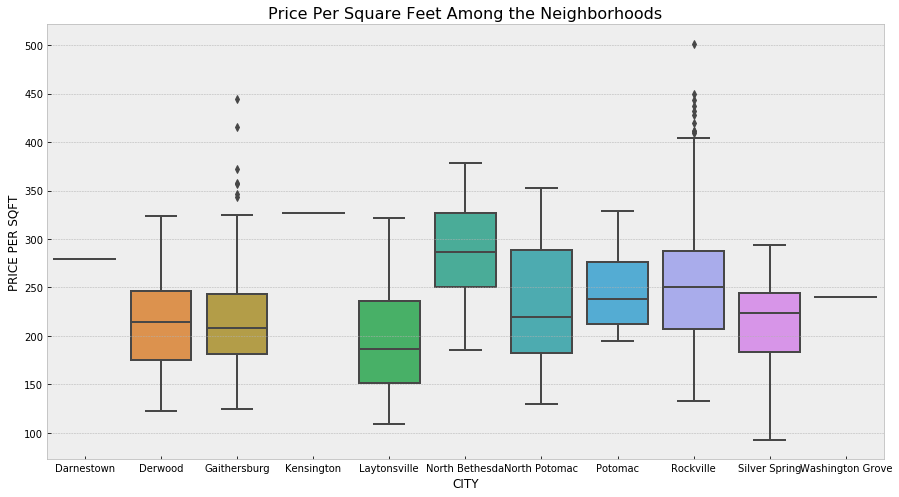

In [18]:
f,ax = plt.subplots(figsize=(15,8))
fig = sns.boxplot(x='CITY', y='PRICE PER SQFT',data=prop_df.sort_values(by='CITY'))
fig.axis()
plt.title('Price Per Square Feet Among the Neighborhoods', size=16)
plt.savefig('capstone_images/unitprice_neighborhoods.png',dpi=300)
plt.show()

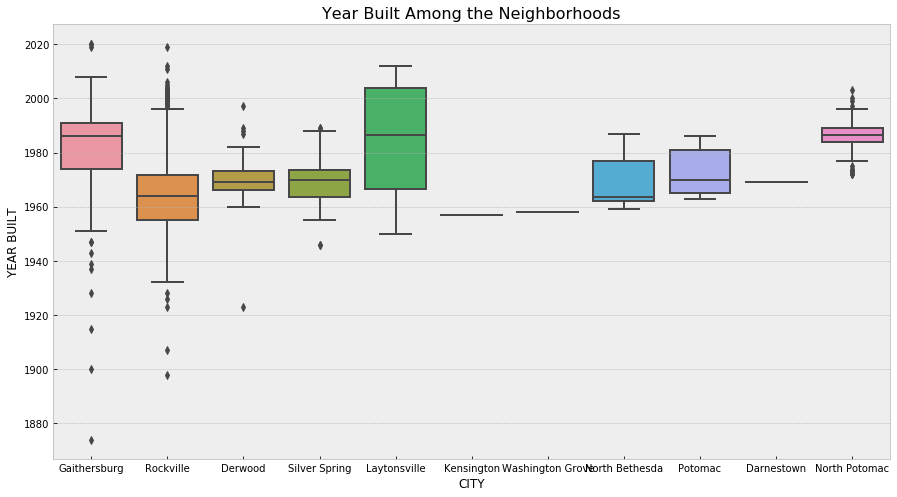

In [20]:
f,ax = plt.subplots(figsize=(15,8))
fig = sns.boxplot(x='CITY', y='YEAR BUILT',data=prop_df.sort_values(by='YEAR BUILT',ascending=True))
fig.axis()
plt.title('Year Built Among the Neighborhoods', size=16)
#plt.savefig('capstone_images/yearbuilt_neighborhoods.png',dpi=300)
plt.show()

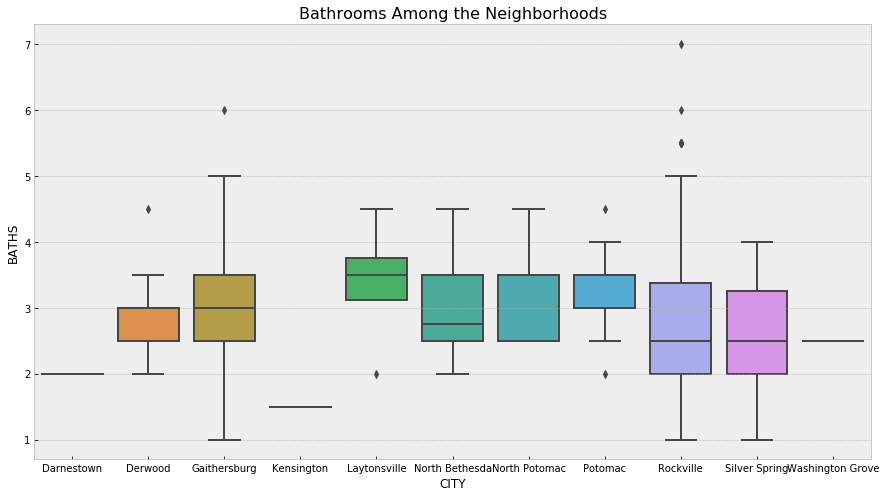

In [16]:
f,ax = plt.subplots(figsize=(15,8))
fig = sns.boxplot(x='CITY', y='BATHS',data=prop_df.sort_values(by='CITY'))
fig.axis()
plt.title('Bathrooms Among the Neighborhoods', size=16)
plt.savefig('capstone_images/baths_neighborhoods.png',dpi=300)
plt.show()

------

## Spatial Visualization

In [13]:
# geolocator = Nominatim(user_agent="ny_explorer")
# location = geolocator.geocode('Derwood, MD')
# longitude = location.longitude
# latitude = location.latitude
# print(latitude, longitude)

NameError: name 'Nominatim' is not defined

In [35]:
def generateBaseMap(default_location=[39.11733, -77.1610916], default_zoom_start=10.5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [36]:
def print_color(df,column):
    val1 = df[column].quantile(0.25)
    val2 = df[column].quantile(0.5)
    val3 = df[column].quantile(0.75)
    
    #print value range
    print("Blue: under {}\nGreen: {}-{}\nYellow: {}-{}\nRed: over {}".format(val1,val1,val2,val2,val3,val3))

    #create new column
    color = []
    for i in df[column]:
        if i < val1:
            color.append('blue')
        elif ((i >= val1) & (i < val2)):
            color.append('green')
        elif ((i >= val2) & (i < val3)):
            color.append('yellow')
        else:
            color.append('red')

    df['color'] = color
    #print(df)
    
    return df

### Visualize spatial distribution of housing price

In [37]:
prop_df_price = print_color(prop_df,'PRICE')

Blue: under 444500.0
Green: 444500.0-533500.0
Yellow: 533500.0-700000.0
Red: over 700000.0


In [38]:
map1 = generateBaseMap()
# add markers to map
for lat, lng, price, color in zip(prop_df_price['LATITUDE'], prop_df_price['LONGITUDE'], prop_df_price['PRICE'], prop_df_price['color']):
    label = 'Price: ${:,.2f}'.format(price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map1)  
map1

In [ ]:
#map1.save(outfile='map1.html')

### Visualize spatial distribution of property size

In [25]:
prop_df_size = print_color(prop_df,'SQUARE FEET')


Blue: under 1825.75
Green: 1825.75-2348.5
Yellow: 2348.5-3200.0
Red: over 3200.0


In [26]:
map2 = generateBaseMap()
# add markers to map
for lat, lng, price, color,size in zip(prop_df_size['LATITUDE'], prop_df_size['LONGITUDE'], prop_df_size['PRICE'], prop_df_size['color'],prop_df_size['SQUARE FEET']):
    label = '{} sqft\n Price: ${:,.2f}'.format(size,price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map2)  
map2

In [ ]:
#map2.save(outfile='capstone_data/map2.html')

### Visualize spatial distribution of price per square feet

In [27]:
prop_df_ppsf = print_color(prop_df,'PRICE PER SQFT')

Blue: under 198.0
Green: 198.0-235.0
Yellow: 235.0-276.0
Red: over 276.0


In [28]:
map3 = generateBaseMap()
# add markers to map
for lat, lng, pricesf, color in zip(prop_df_ppsf['LATITUDE'], prop_df_ppsf['LONGITUDE'], prop_df_ppsf['PRICE PER SQFT'], prop_df_ppsf['color']):
    label = 'Price per sqft: ${:,.2f}'.format(pricesf)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map3)  
map3

In [ ]:
prop_df_bath = print_color(prop_df,'BATHS')
map4 = generateBaseMap()
# add markers to map
for lat, lng, bath, color in zip(prop_df_bath['LATITUDE'], prop_df_bath['LONGITUDE'], prop_df_bath['BATHS'], prop_df_bath['color']):
    label = '# of baths: {}'.format(bath)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map4)  
map4

### Visualize spatial distribution of year built

In [29]:
prop_df_year = print_color(prop_df,'YEAR BUILT')
map5 = generateBaseMap()
# add markers to map
for lat, lng, year, color in zip(prop_df_year['LATITUDE'], prop_df_year['LONGITUDE'], prop_df_year['YEAR BUILT'], prop_df_year['color']):
    label = 'Built in {}'.format(round(year))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map5)  
map5

Blue: under 1961.0
Green: 1961.0-1970.0
Yellow: 1970.0-1986.0
Red: over 1986.0


In [ ]:
from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data=prop_df[['LATITUDE','LONGITUDE','PRICE']].groupby(['LATITUDE','LONGITUDE']).sum().reset_index().values.tolist(),radius=8,max_zoom=13).add_to(base_map)

base_map

In [ ]:
location = [latitude,longitude]
map1 = folium.Map(location=location,
                  zoom_start=11, 
                  control_scale=True)
prop_df.apply(lambda row: folium.CircleMarker(location=[row["LATITUDE"],row['LONGITUDE']],
                                              radius=5).add_to(map1),axis=1)
map1

In [ ]:
prop_df.groupby(['LATITUDE','LONGITUDE','CITY']).size().reset_index(name='count').sort_values(by='count',ascending=False)